Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pm2.5   100 non-null    float64
 1   pm10    100 non-null    float64
 2   no2     100 non-null    float64
 3   so2     100 non-null    float64
 4   co      100 non-null    float64
 5   o3      100 non-null    float64
 6   AQI     100 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 5.6 KB
None

Dataset Head:
        pm2.5        pm10         no2         so2        co          o3  AQI
0  448.917939  255.819317  122.269838   39.939118  0.694233   69.514641  392
1   67.343304  286.544483  123.337822  105.964910  8.655265  232.217161  310
2    8.999545  385.411326  172.636131   56.167135  5.718719   45.753357  482
3  243.069987  162.749065   84.006127   21.183122  8.119184   93.476772  208
4  482.552314  197.614738  172.290496   11.110015  8.813344  249.536683  239

Missing Va

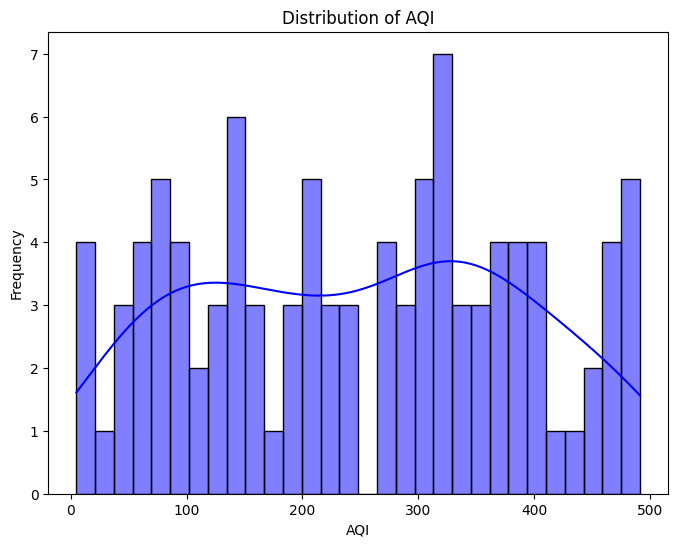

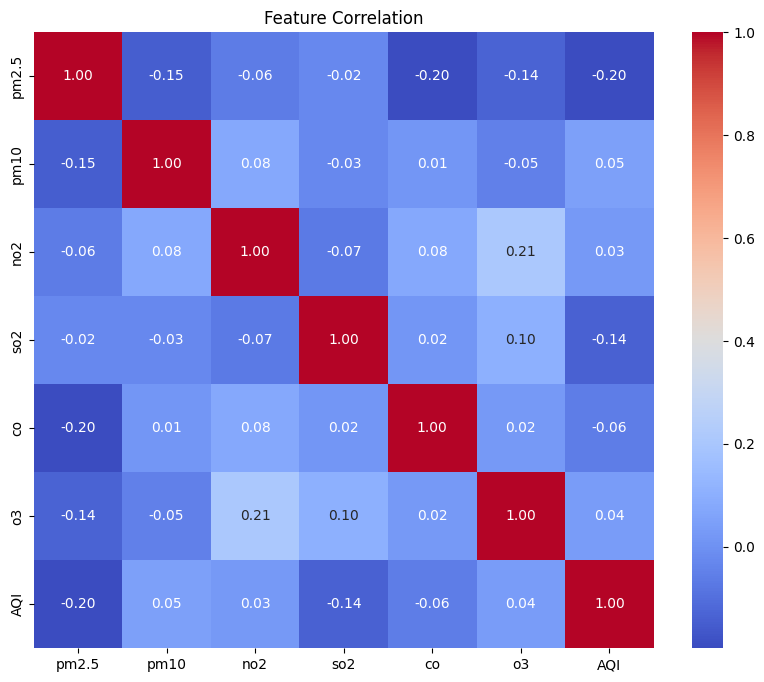


Model Evaluation:
Mean Absolute Error (MAE): 133.18
Mean Squared Error (MSE): 26521.90
R² Score: -0.70


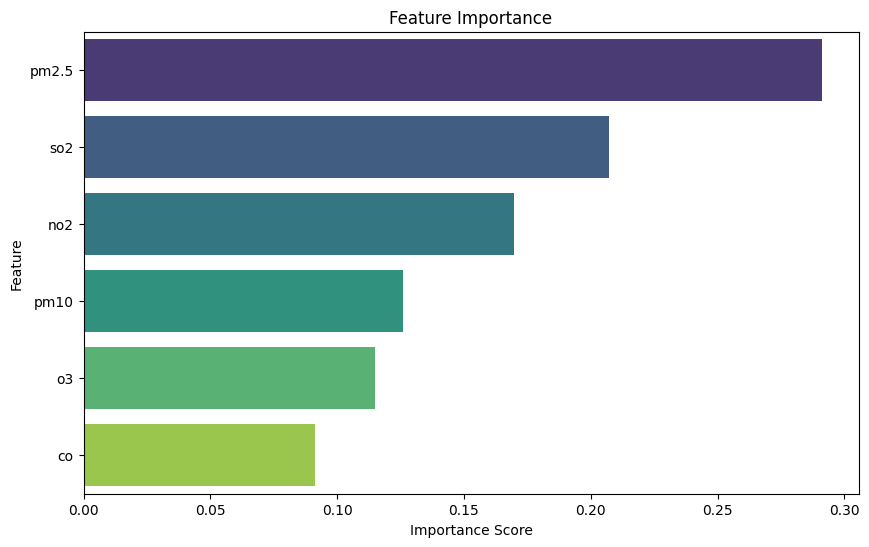

In [1]:
# Environmental Monitoring Project: Air Quality Prediction

# Import necessary libraries
import pandas as pd
import numpy as np# both pandas and numpy For data handling and numerical computations
import matplotlib.pyplot as plt
import seaborn as sns# both matplotlib.pyplot and seaborn For data visualization.
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# above all are For splitting data, building the model (Random Forest), and evaluating performance.

# Load the dataset
# place with the path to our dataset 
data = pd.read_csv(r'C:\Users\saima\OneDrive\Desktop\montdataset.csv')

print("Dataset Information:")
print(data.info())# it displays data info about datatypes 
print("\nDataset Head:")
print(data.head())# it shows the first 5 rows to preview the dataset

# Handle missing values (if any)
print("\nMissing Values:")
print(data.isnull().sum())

# Fill missing values with median for simplicity
data.fillna(data.median(), inplace=True)

# performing Exploratory Data Analysis (EDA) to show how aqi value are distributed 
# Visualize the distribution of AQI
#AQI-air quality index
plt.figure(figsize=(8, 6))
sns.histplot(data['AQI'], bins=30, kde=True, color='blue')
plt.title('Distribution of AQI')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation')
plt.show()

# Define features and target
X = data.drop(columns=['AQI'])  # Replace 'AQI' with the column containing AQI values
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis', hue='Feature')

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()